In [ ]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Zomato/Zomato.zip

Archive:  gdrive/My Drive/Zomato/Zomato.zip
  inflating: zomato.csv              


In [ ]:
#reading the dataset
zomato_orgnl=pd.read_csv("zomato.csv")
zomato_orgnl

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


**Data Preprocessing**

In [ ]:
#Deleting Unnecessary Columns
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1) 

In [ ]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [ ]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [ ]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [ ]:
#Removing '/5' from Rates
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [ ]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

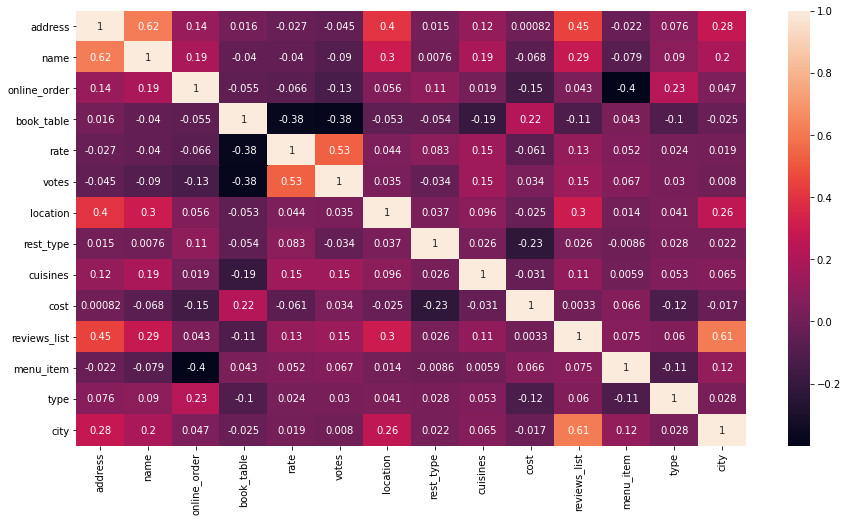

In [ ]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

In [ ]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

**Prediction Models**

In [ ]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
LINREG = r2_score(y_test,y_pred)
print('R2_Score:',r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))

R2_Score: 0.273516551710296
Mean Absolute Error: 0.29249106295471705


In [ ]:
#Preparing a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
DECREG = r2_score(y_test,y_predict)
print('R2_Score:',r2_score(y_test,y_predict))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict))

R2_Score: 0.8555347835405929
Mean Absolute Error: 0.07926933756377276


In [ ]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
RANREG = r2_score(y_test,y_predict)
print('R2_Score:',r2_score(y_test,y_predict))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict))

R2_Score: 0.8773808619238765
Mean Absolute Error: 0.08649348707496263


In [ ]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
EXTREG = r2_score(y_test,y_predict)
print('R2_Score:',r2_score(y_test,y_predict))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict))

R2_Score: 0.9412527460771679
Mean Absolute Error: 0.03640923472812114


Text(0.5, 0, 'Models')

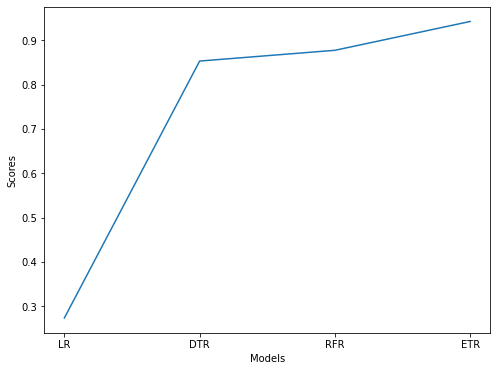

In [ ]:
models = ['LR','DTR','RFR','ETR']
m= np.array(models)
scores = [LINREG,DECREG,RANREG,EXTREG]
s= np.array(scores)
plt.figure(figsize=(8,6))
plt.plot(m,s)
plt.ylabel('Scores')
plt.xlabel('Models')

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants allowing table booking or not')

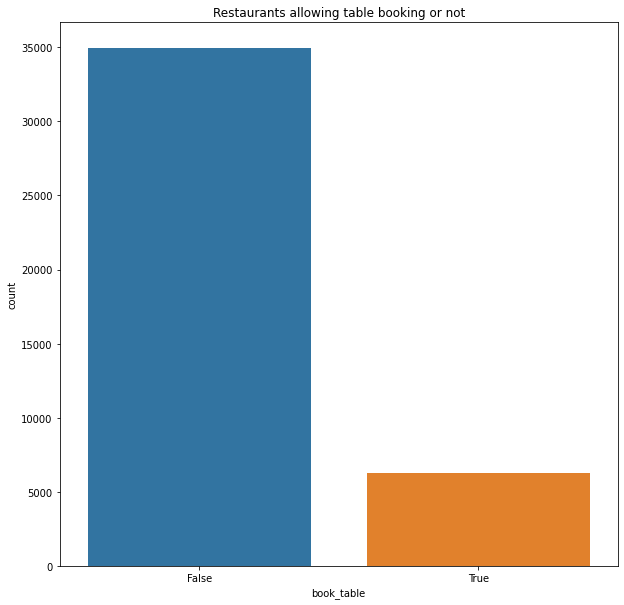

In [ ]:
#Restaurants allowing table booking or not
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

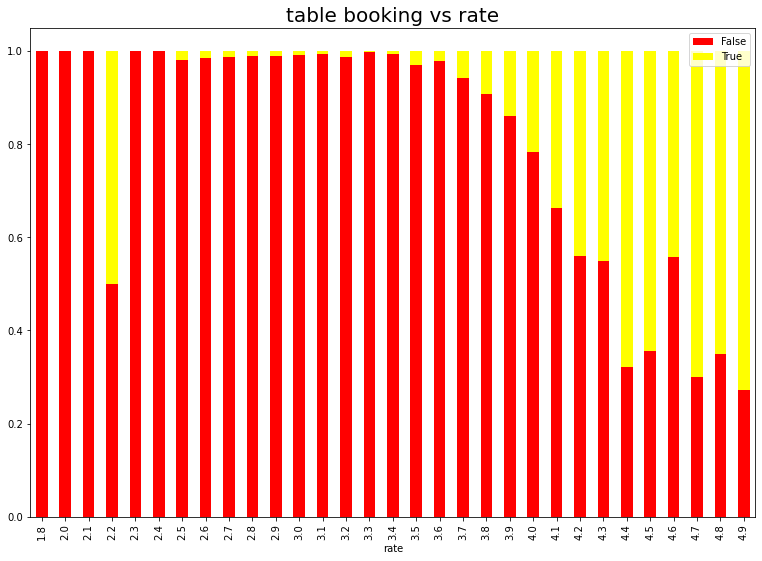

In [ ]:
#Table booking vs Rate
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location')

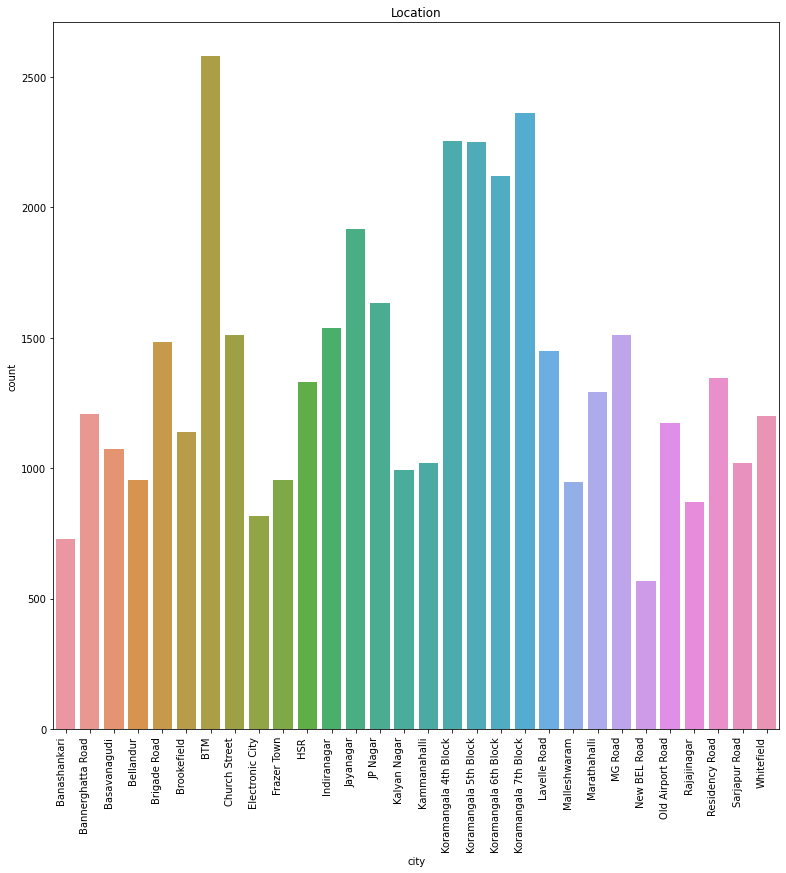

In [ ]:
# Location
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location')

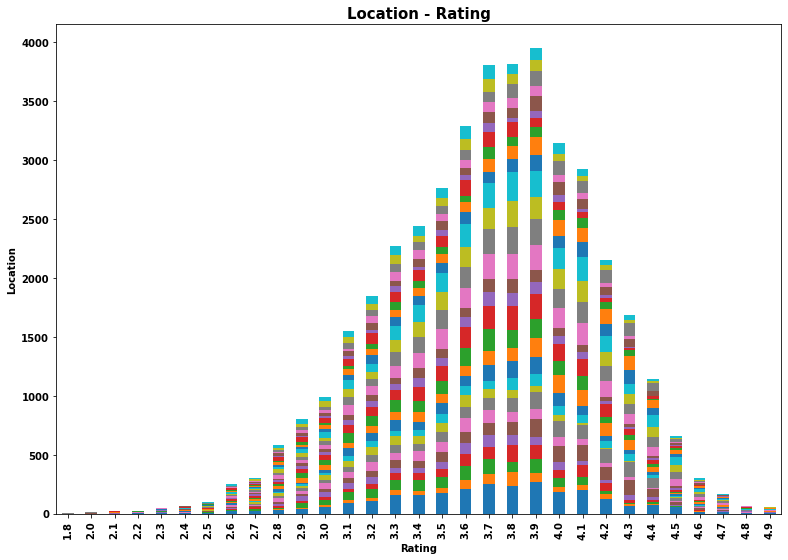

In [ ]:
#Location and Rating
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restuarant Type')

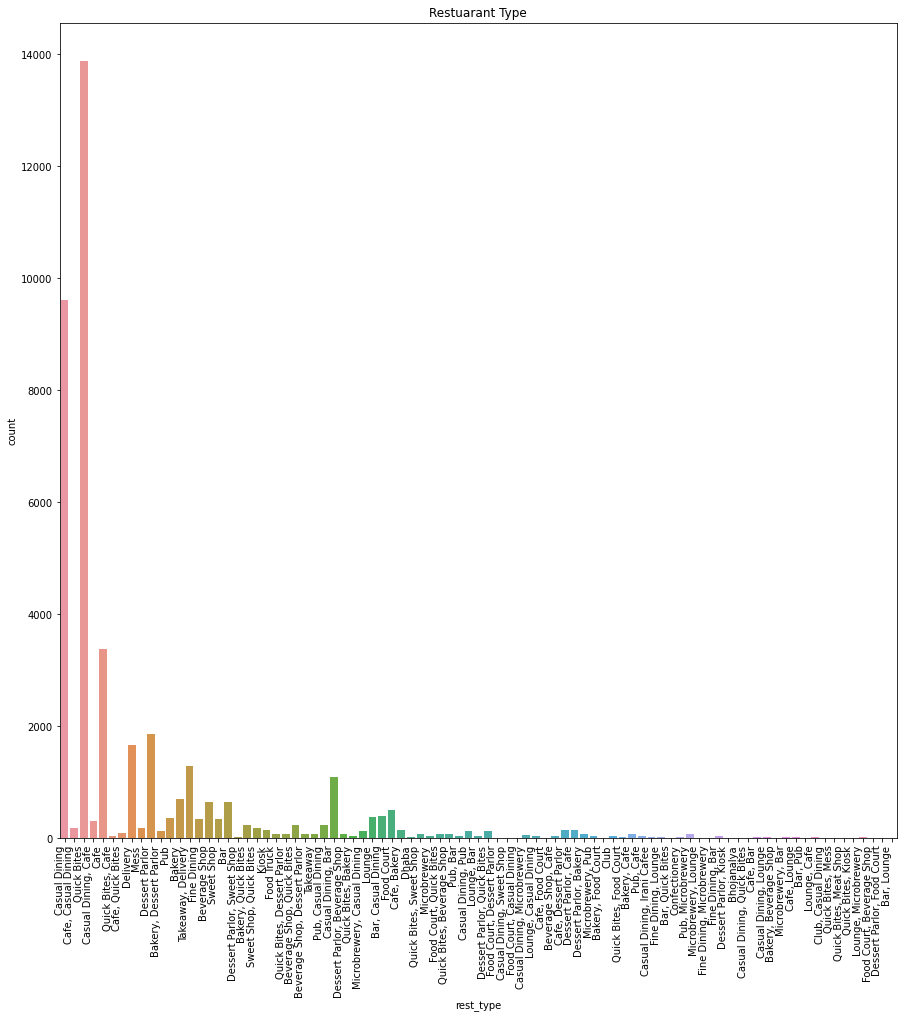

In [ ]:
#Restaurant Type
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

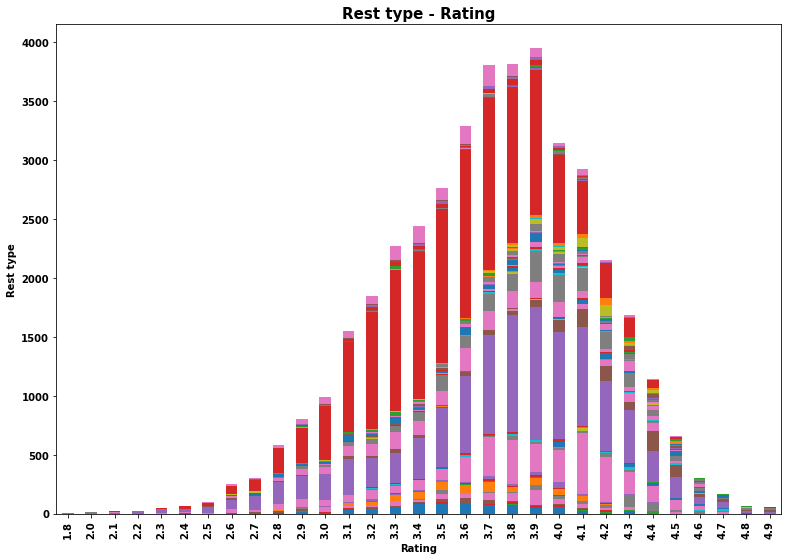

In [ ]:
#Gaussian Rest type and Rating
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Service')

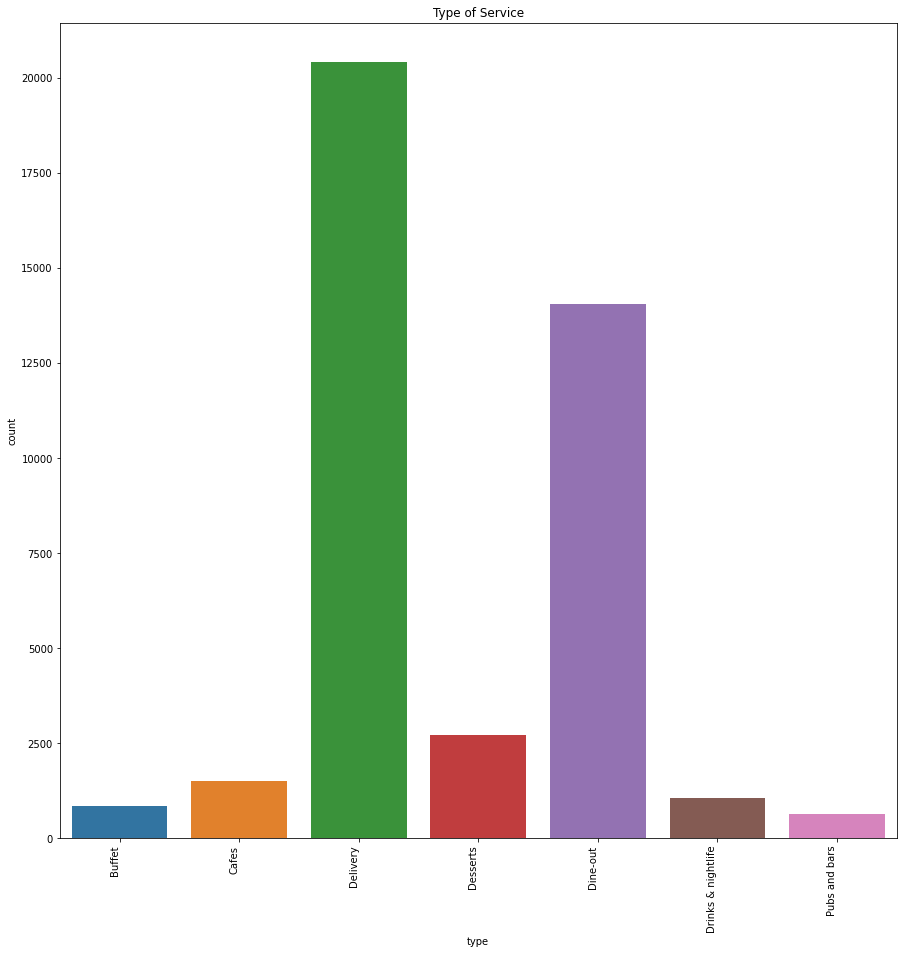

In [ ]:
#Types of Services
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

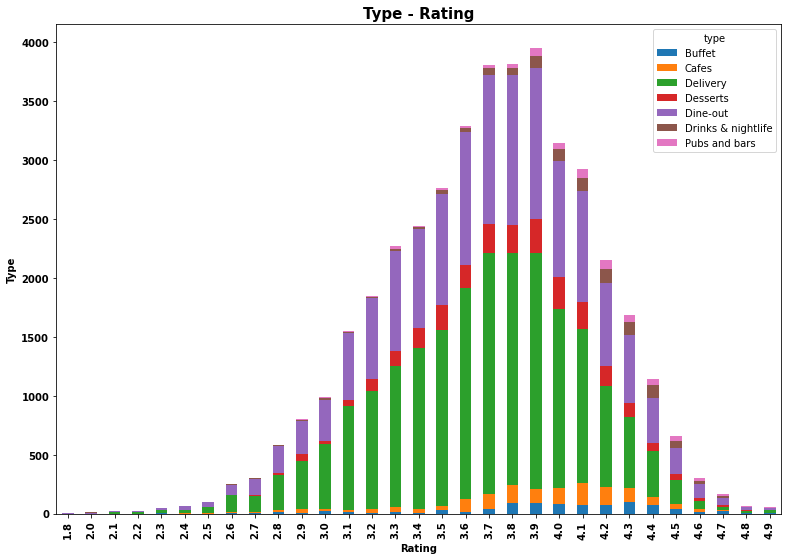

In [ ]:
#Type and Rating
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cost of Restuarant')

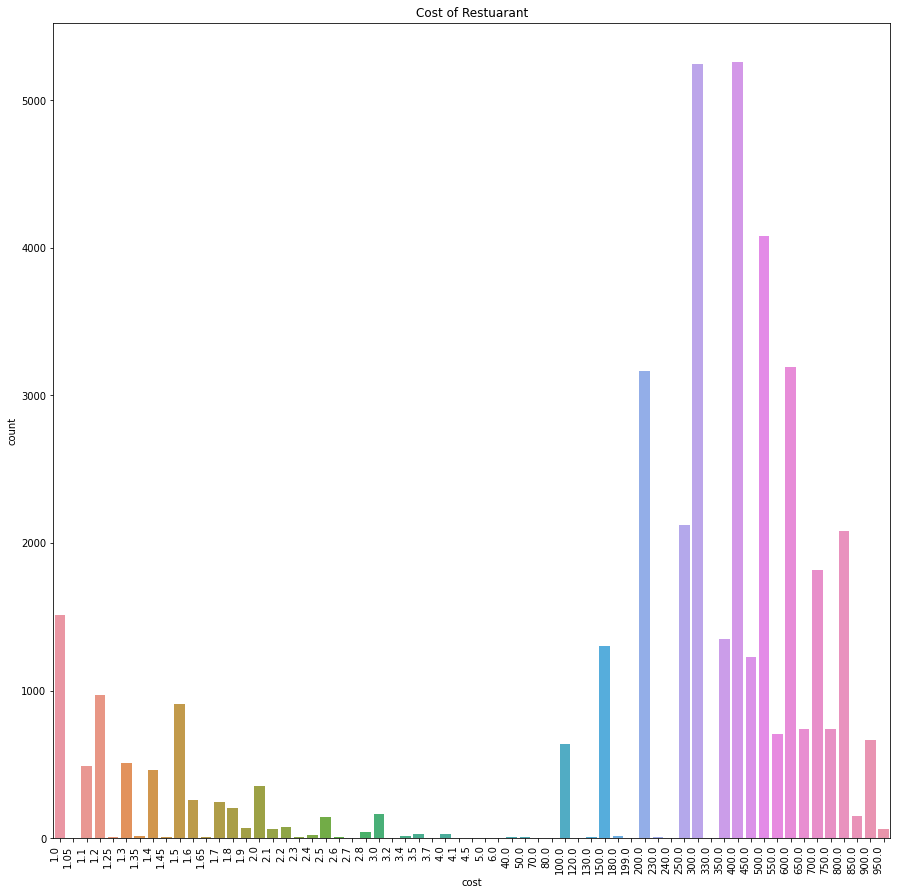

In [ ]:
#Cost of Restuarant
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 1.0, 'No. of restaurants in a Location')

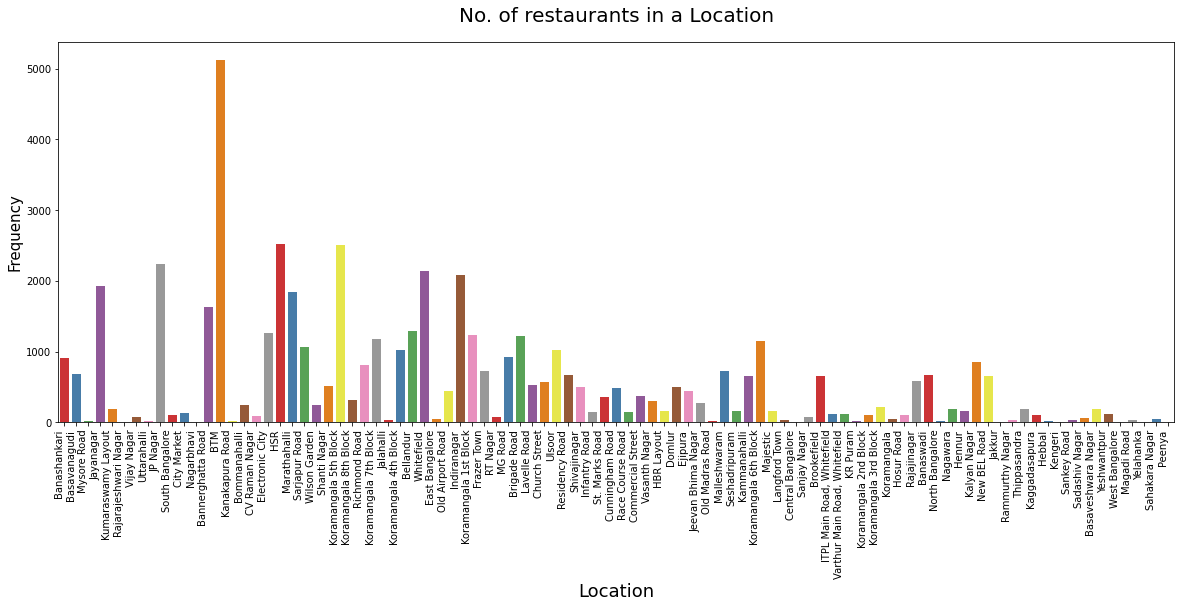

In [ ]:
#No. of restaurants in a Location',
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_orgnl, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

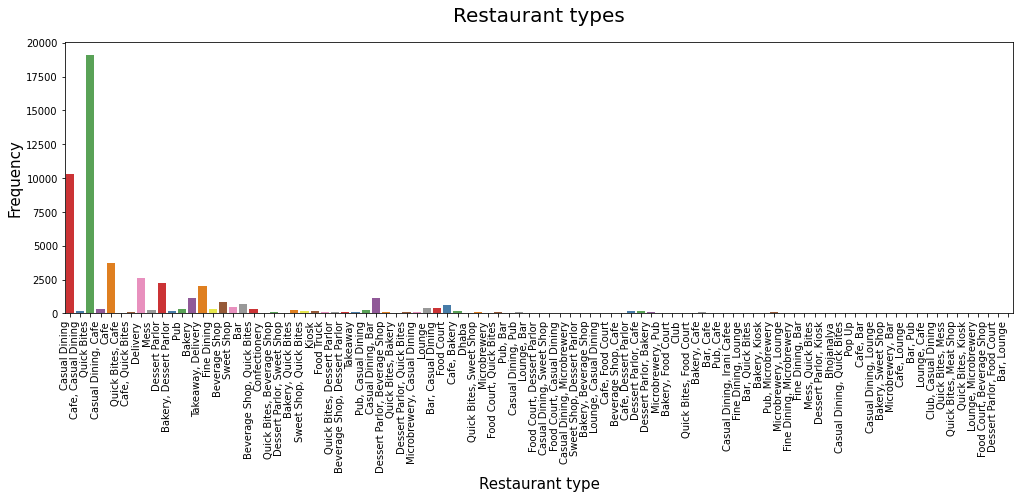

In [ ]:
#Restaurant type
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_orgnl, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

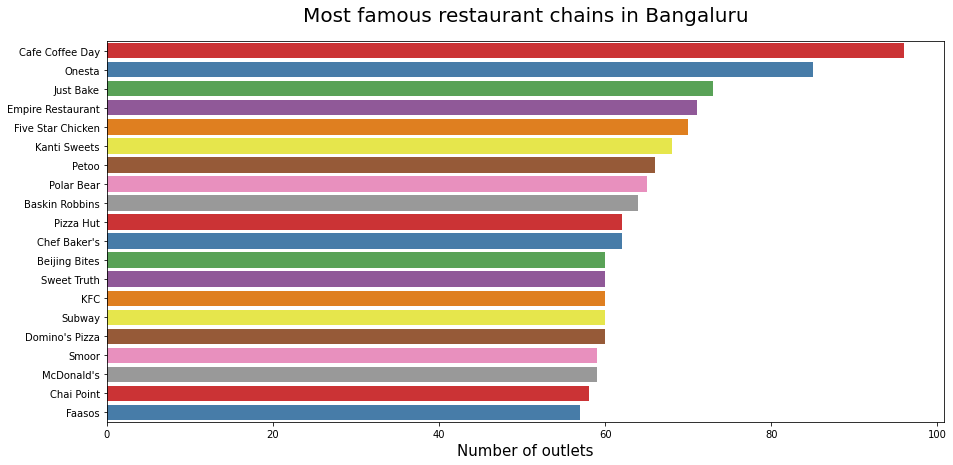

In [ ]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=zomato_orgnl['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)